Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Uploading Dataset

In [3]:
df = pd.read_csv("/content/Ice Cream.csv")

In [4]:
df.head(10)

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
5,14.4,368
6,13.8,309
7,30.9,697
8,1.0,56
9,31.7,738


In [5]:
df.tail(10)

,Temperature,Revenue
490,23.9,585
491,34.5,810
492,23.1,553
493,15.0,378
494,25.2,572
495,22.3,525
496,32.9,756
497,12.6,307
498,22.4,567
499,29.0,656


Checking for missing values

In [32]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Temperature    0
Revenue        0
dtype: int64


Input data

In [15]:
X = df.drop(columns=['Revenue'])
X

,Temperature
0,24.6
1,26.1
2,27.8
3,20.6
4,11.6
...,...
495,22.3
496,32.9
497,12.6
498,22.4


Target Data

In [16]:
y = df['Revenue']
y

,Revenue
0,535
1,626
2,661
3,488
4,317
...,...
495,525
496,756
497,307
498,567


Splitting the data as training and testing data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting the datas into model

In [26]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Prediction

In [29]:
y_pred=model.predict(X_test)

In [36]:
predicted_model=model.predict([np.array([22.7])])
print(f"Predicted Revenue: {predicted_model[0]:.2f}")

Predicted Revenue: 531.60


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Accuracy Check

In [33]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Mean Squared Error (MSE): 652.49
Root Mean Squared Error (RMSE): 25.54
R-squared: 0.98


Corelation Matrix

In [40]:
import pandas as pd
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
              Temperature   Revenue
Temperature     1.000000  0.989841
Revenue         0.989841  1.000000


Scatterplot

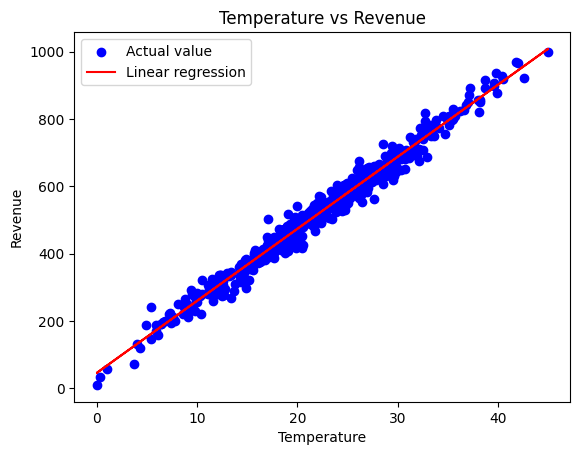

In [37]:
if X.shape[1] == 1:
    plt.scatter(X, y, color='blue', label='Actual value')
    plt.plot(X, model.predict(X), color='red', label='Linear regression')
    plt.xlabel('Temperature')
    plt.ylabel('Revenue')
    plt.title('Temperature vs Revenue')
    plt.legend()
    plt.show()
else:
    print("Cannot plot regression line for multi-dimensional data.")